<a href="https://colab.research.google.com/github/moganakumaran/Complete-Python-3-Bootcamp/blob/master/Feature_importance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Feature Importance
from sklearn import datasets
from sklearn import metrics
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing

In [0]:
# load the iris datasets
hotel=pd.read_csv('hotel_bookings1.csv')


In [0]:
!pwd

/content


In [0]:
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [0]:
#selecting only desired columns-- but run correlation to identify
temp=hotel.iloc[:,[0,1,12,13,14,15]]

In [0]:
temp
print(type(temp))

<class 'pandas.core.frame.DataFrame'>


In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
temp['hotel'] = label_encoder.fit_transform(temp['hotel'])
temp['meal'] = label_encoder.fit_transform(temp['meal'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
temp.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel
0,1,0,0,PRT,Direct,Direct
1,1,0,0,PRT,Direct,Direct
2,1,0,0,GBR,Direct,Direct
3,1,0,0,GBR,Corporate,Corporate
4,1,0,0,GBR,Online TA,TA/TO


In [0]:
temp.hotel.value_counts()

0    79330
1    40060
Name: hotel, dtype: int64

In [0]:
temp['country'] = temp['country'].astype(str)
temp['country'] = label_encoder.fit_transform(temp['country'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
temp.head()

,hotel,is_canceled,meal,country,market_segment,distribution_channel
0,1,0,0,135,Direct,Direct
1,1,0,0,135,Direct,Direct
2,1,0,0,59,Direct,Direct
3,1,0,0,59,Corporate,Corporate
4,1,0,0,59,Online TA,TA/TO


In [0]:
temp['country'].nunique()

178

In [0]:
temp['distribution_channel'] = temp['distribution_channel'].astype(str)
temp['distribution_channel'] = label_encoder.fit_transform(temp['distribution_channel'])
temp['market_segment'] = temp['market_segment'].astype(str)
temp['market_segment'] = label_encoder.fit_transform(temp['market_segment'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [0]:
X = temp.drop('is_canceled',axis=1)
y = temp['is_canceled']

In [0]:
# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [0]:
print(model.feature_importances_)

[0.05524699 0.03685193 0.53498607 0.27864777 0.09426724]


In [0]:
p_values = pd.Series(model.feature_importances_,index = X.columns)
p_values.sort_values(ascending = False , inplace = True)



In [0]:
p_values

country                 0.534986
market_segment          0.278648
distribution_channel    0.094267
hotel                   0.055247
meal                    0.036852
dtype: float64

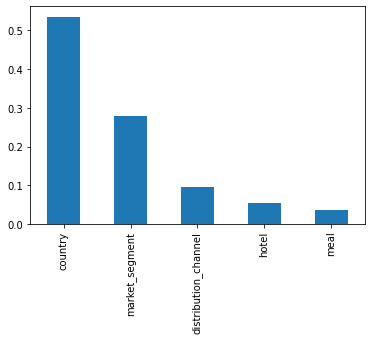

In [0]:
p_values.plot.bar()

In [0]:
from sklearn.tree import DecisionTreeClassifier 
    # Decision tree with entropy 

In [0]:
clf_entropy = DecisionTreeClassifier( 
            criterion = "gini", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 

In [0]:
clf_entropy.fit(X, y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [0]:
print(clf_entropy.feature_importances_)


[0.01077773 0.         0.40436421 0.58485806 0.        ]


In [0]:
p_values = pd.Series(clf_entropy.feature_importances_,index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values

market_segment          0.584858
country                 0.404364
hotel                   0.010778
distribution_channel    0.000000
meal                    0.000000
dtype: float64

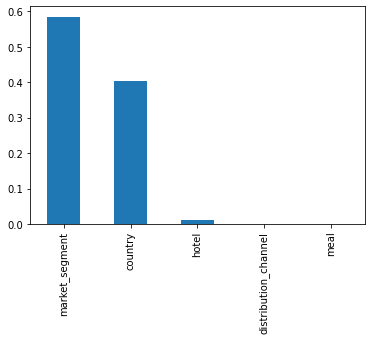

In [0]:
p_values.plot.bar()

In [0]:
############################RFE METHOD OF FEATURE SELECTION ###################
###SVM Method

In [0]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

In [0]:
# create the RFE model for the svm classifier 
# and select attributes
svm = LinearSVC()

In [0]:
# create the RFE model for the svm classifier 
# and select attributes
rfe = RFE(svm, 100)
rfe = rfe.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
# print summaries for the selection of attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True]
[1 1 1 1 1]


In [0]:
############FEATURE SELECTION using SelectFromModel

In [0]:
from sklearn.feature_selection import *
from sklearn.linear_model import LogisticRegression

In [0]:
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1',solver='liblinear'))
sel_.fit(X, y)
selected_feat = X.columns[(sel_.get_support())]

In [0]:
selected_feat

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel'], dtype='object')

In [0]:
############LASSO Feature Selection

In [0]:
from sklearn.linear_model import Lasso
import pprint

In [0]:
lasso = Lasso(alpha=.7)
lasso.fit(X, y)
names = [X.columns.values]
#print "Lasso model: " pretty_print_linear(lasso.coef_, names, sort = True)

print("Lasso model:",  lasso.coef_)

Lasso model: [-0.          0.          0.00249432  0.          0.        ]
